In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)


In [5]:
print(f'Size of train: {train.shape}')
print(f'Size of test: {test.shape}')

Size of train: (1460, 80)
Size of test: (1459, 79)


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
train.describe(include=['O']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
num_columns = train.select_dtypes(include=['number']).columns.tolist()
num_columns.remove('SalePrice')

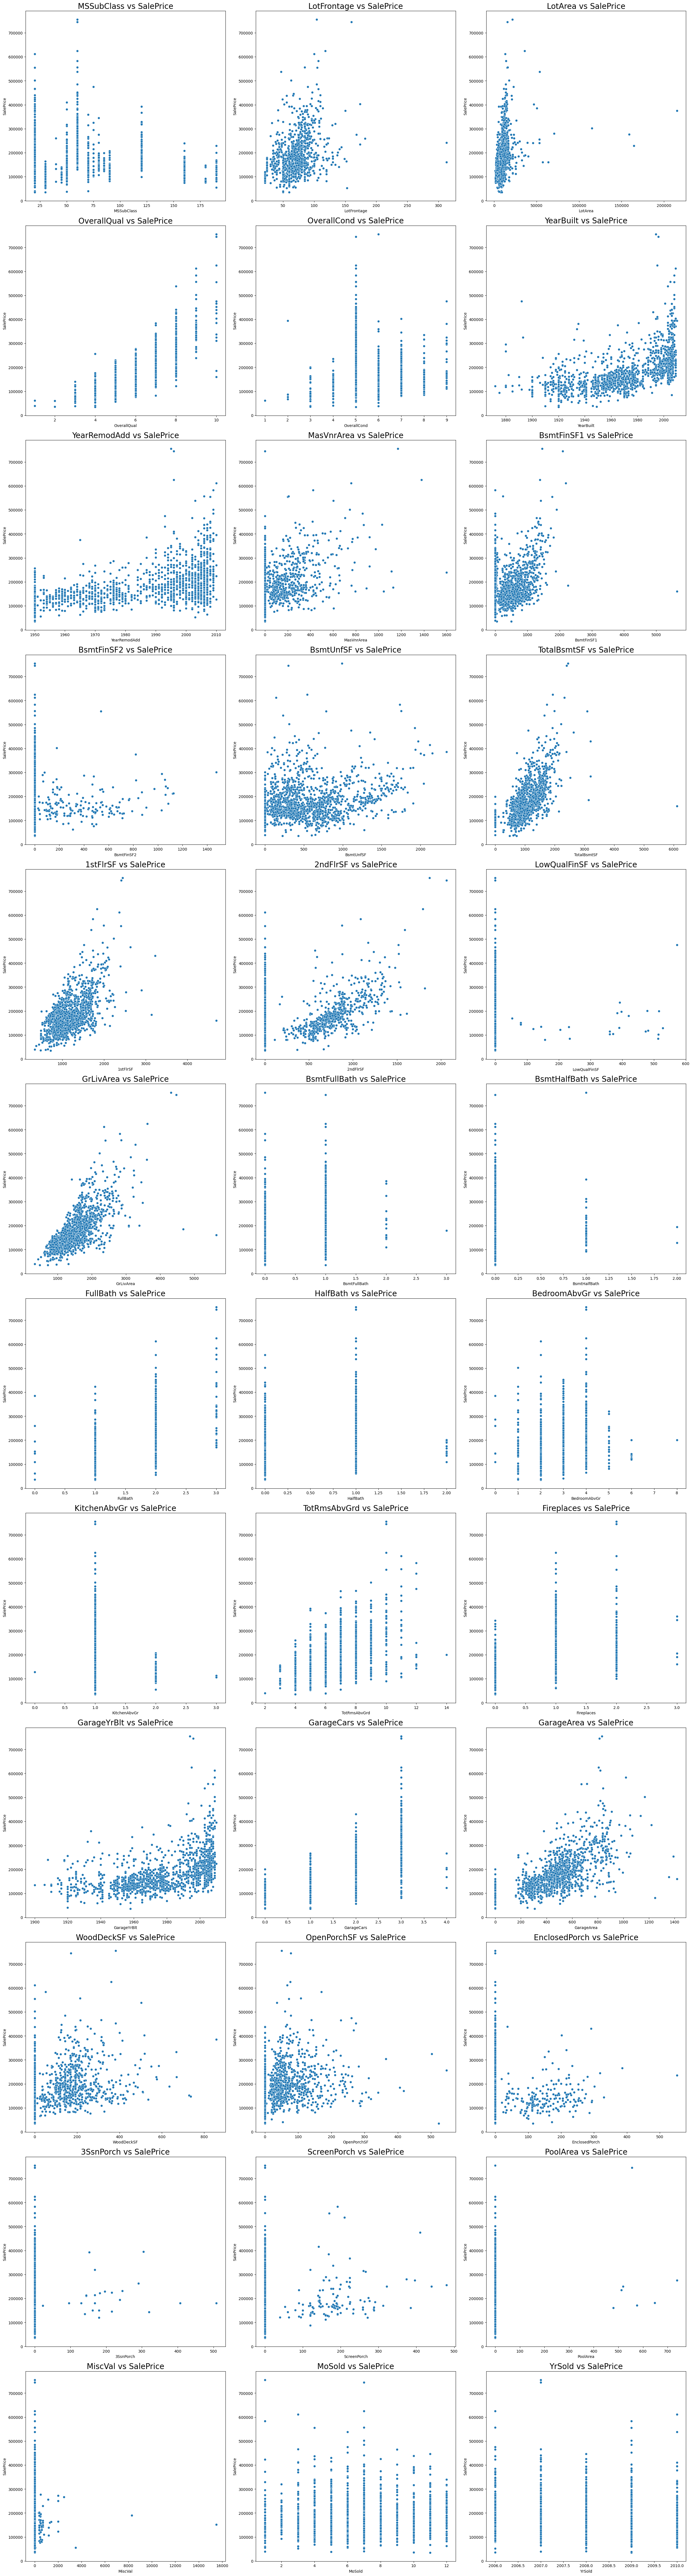

In [9]:

#Create the figure with 3 rows and dynamic number of columns
fig, axes = plt.subplots(len(num_columns) // 3+1, 3, figsize=(25, 100))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through numerical columns and create scatter plots
for i, feature in enumerate(num_columns):
    sns.scatterplot(x=train[feature], y=train['SalePrice'], ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice', fontsize=20)

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Apply tight layout
plt.tight_layout()
plt.show()

In [10]:
GrLivArea_outlier = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
GrLivArea_outlier

Index([523, 1298], dtype='int64')

In [11]:
train.loc[[523, 1298], ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
1298,5642,160000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

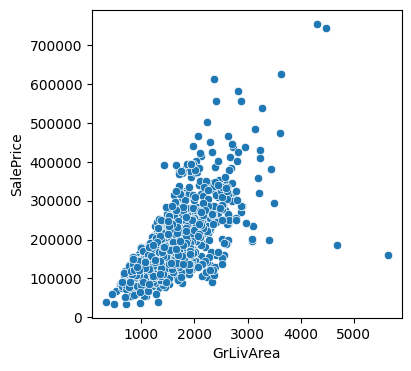

In [12]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [13]:
train = train.drop(GrLivArea_outlier)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

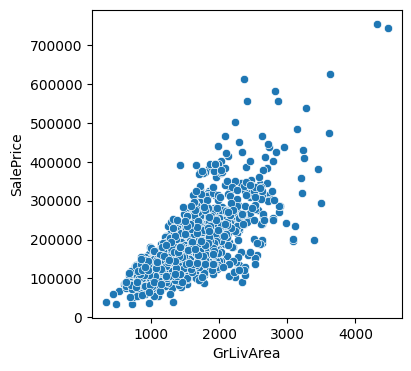

In [14]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

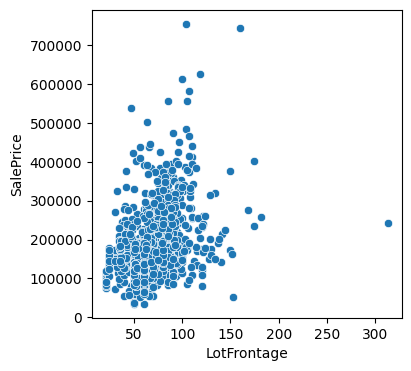

In [15]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])

In [16]:
LotFrontage_outlier = train[train['LotFrontage']>300].index
train = train.drop(LotFrontage_outlier)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

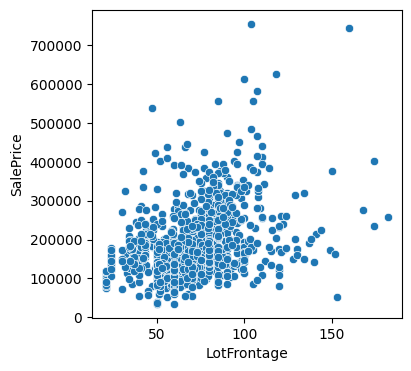

In [17]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])

In [18]:
LotArea_outlier = train[train['LotArea'] > 60000].index
train = train.drop(LotArea_outlier)


In [19]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

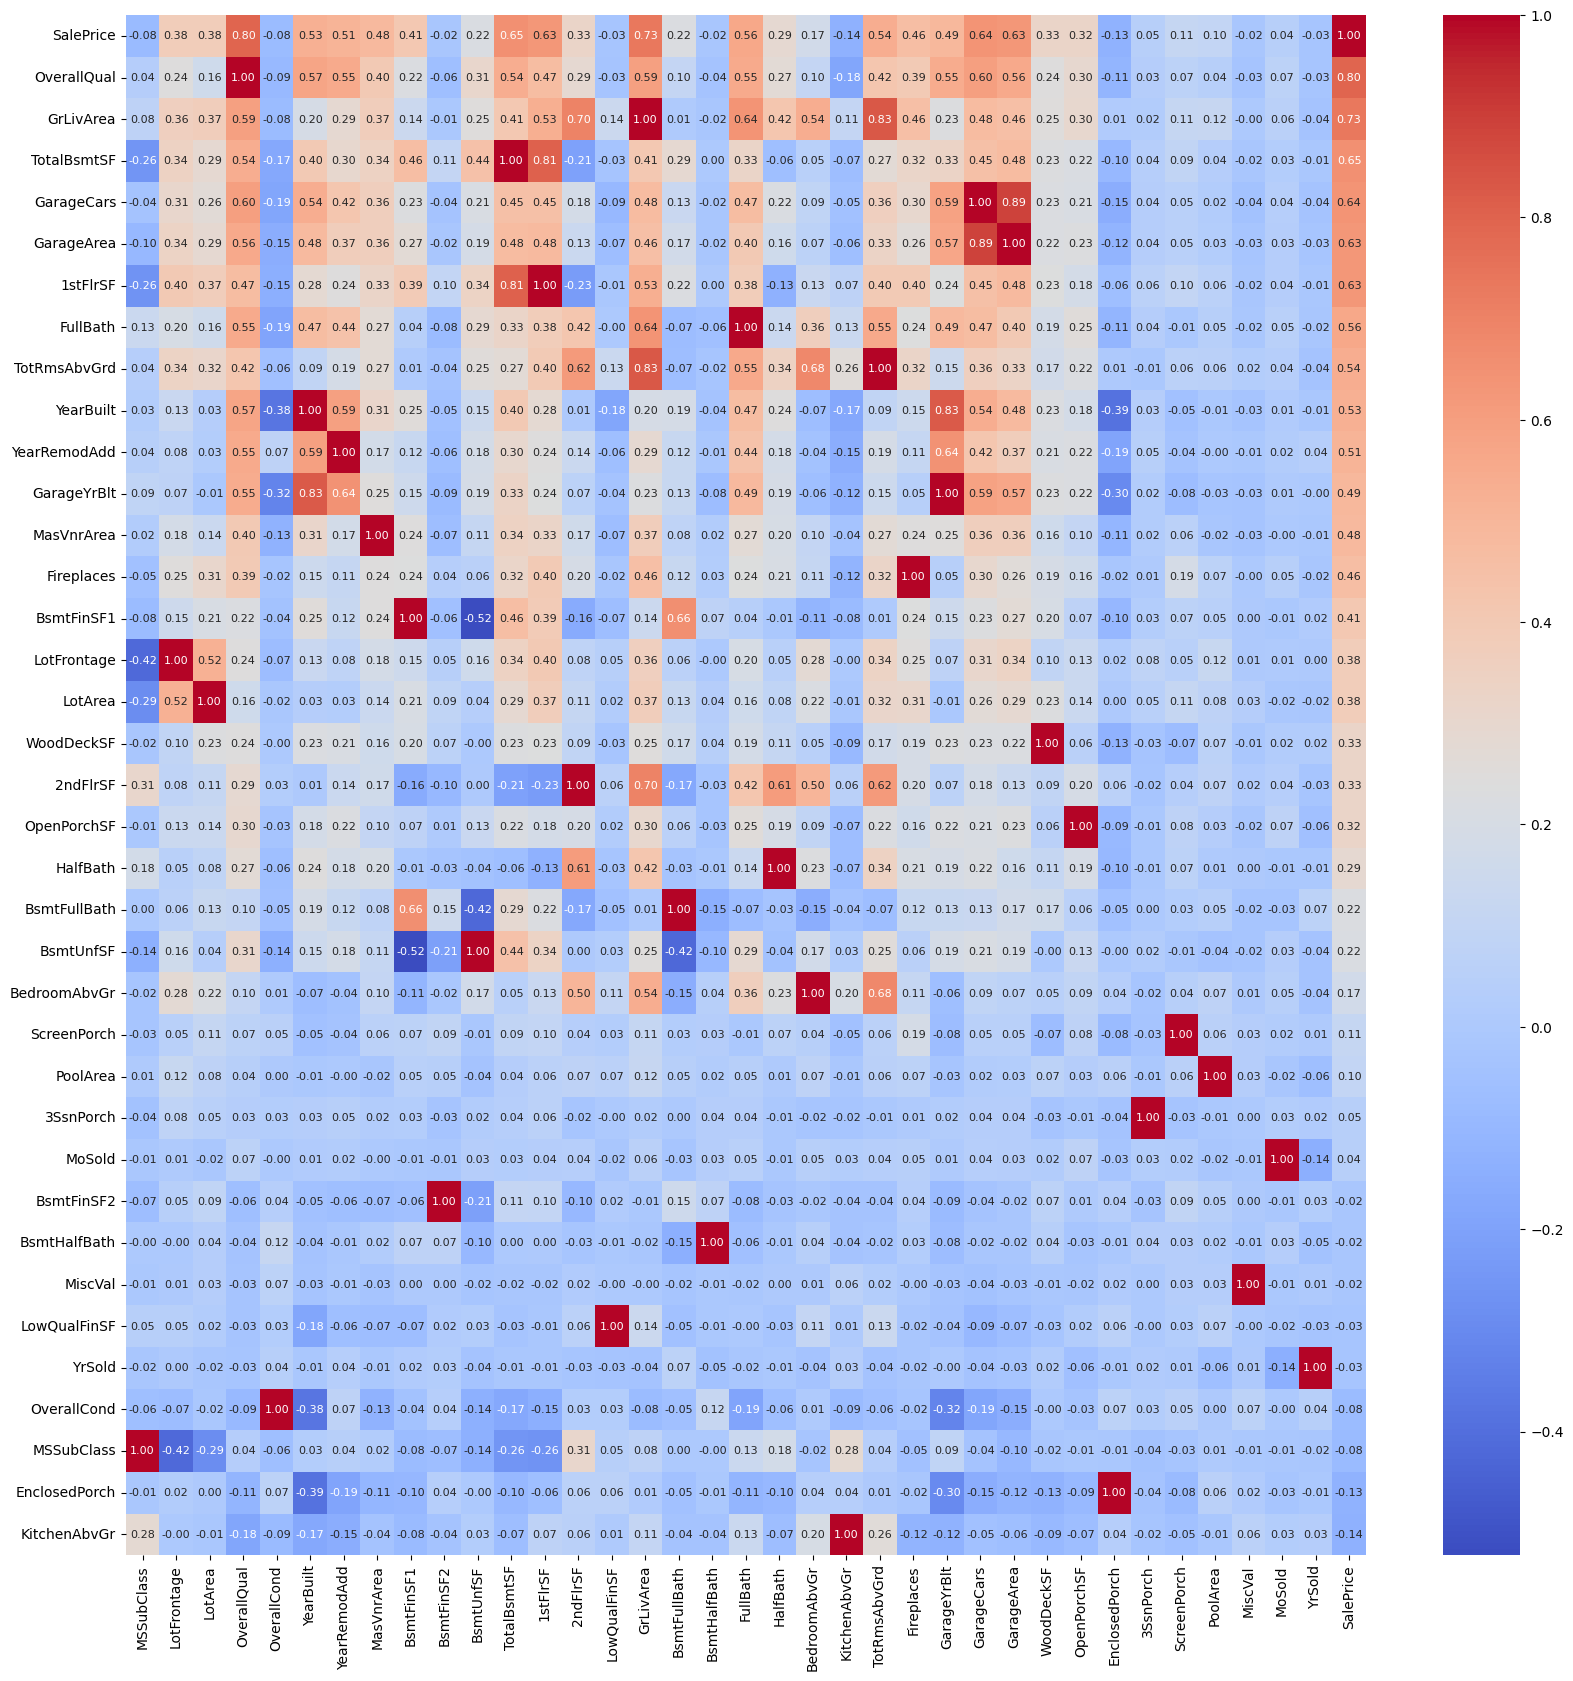

In [20]:
plt.figure(figsize=(20, 20))
num_cols = train.select_dtypes('number')
correlation_matrix = num_cols.corr().sort_values(by='SalePrice', ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f', annot_kws={'size': 8})